# Placeholder for Text

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, auc, roc_curve
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras_visualizer import visualizer 

In [3]:
tf.__version__

'2.12.0'

In [4]:
tf.keras.__version__

'2.12.0'

# Data

importing Jupyter notebook from Data_Cleaning.ipynb


<string>:6: DtypeWarning: Columns (18,19,22) have mixed types. Specify dtype option on import or set low_memory=False.


Number of data points: 396029

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396029 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396029 non-null  int64  
 1   term                  396029 non-null  object 
 2   int_rate              396029 non-null  float64
 3   installment           396029 non-null  float64
 4   emp_title             373102 non-null  object 
 5   emp_length            377728 non-null  object 
 6   home_ownership        396029 non-null  object 
 7   annual_inc            396029 non-null  float64
 8   verification_status   396029 non-null  object 
 9   issue_d               396029 non-null  object 
 10  loan_status           396029 non-null  object 
 11  purpose               396029 non-null  object 
 12  title                 394274 non-null  object 
 13  dti                   396029 non-null  float64
 14  earliest_cr_line     

,term,pct
36 months,302004,76.26%
60 months,94025,23.74%


,emp_title,pct
Teacher,4389,1.18%
Manager,4250,1.14%
Registered Nurse,1856,0.50%
RN,1846,0.49%
Supervisor,1830,0.49%
...,...,...
Postman,1,0.00%
"McCarthy & Holthus, LLC",1,0.00%
jp flooring,1,0.00%
Histology Technologist,1,0.00%


,emp_length,pct
10+ years,126040,33.37%
2 years,35827,9.48%
< 1 year,31725,8.40%
3 years,31665,8.38%
5 years,26495,7.01%
1 year,25882,6.85%
4 years,23952,6.34%
6 years,20841,5.52%
7 years,20819,5.51%
8 years,19168,5.07%


,home_ownership,pct
MORTGAGE,198347,50.08%
RENT,159790,40.35%
OWN,37746,9.53%
OTHER,112,0.03%
NONE,31,0.01%
ANY,3,0.00%


,verification_status,pct
Verified,139563,35.24%
Source Verified,131385,33.18%
Not Verified,125081,31.58%


,issue_d,pct
2014,102859,25.97%
2013,97662,24.66%
2015,94264,23.80%
2012,41202,10.40%
2016,28088,7.09%
2011,17435,4.40%
2010,9258,2.34%
2009,3826,0.97%
2008,1240,0.31%
2007,195,0.05%


,loan_status,pct
Fully Paid,318357,80.39%
Charged Off,77672,19.61%


,purpose,pct
debt_consolidation,234507,59.21%
credit_card,83019,20.96%
home_improvement,24029,6.07%
other,21185,5.35%
major_purchase,8790,2.22%
small_business,5701,1.44%
car,4697,1.19%
medical,4196,1.06%
moving,2854,0.72%
vacation,2452,0.62%


,title,pct
Debt consolidation,152472,38.67%
Credit card refinancing,51487,13.06%
Home improvement,15264,3.87%
Other,12930,3.28%
Debt Consolidation,11608,2.94%
...,...,...
Daughter's Wedding Bill,1,0.00%
gotta move,1,0.00%
creditcardrefi,1,0.00%
Debt/Home,1,0.00%


,earliest_cr_line,pct
2000,29366,7.42%
2001,29083,7.34%
1999,26491,6.69%
2002,25901,6.54%
2003,23657,5.97%
...,...,...
1951,3,0.00%
1950,3,0.00%
1953,2,0.00%
1944,1,0.00%


,initial_list_status,pct
f,238065,60.11%
w,157964,39.89%


,application_type,pct
INDIVIDUAL,395318,99.82%
JOINT,425,0.11%
DIRECT_PAY,286,0.07%


,address,pct
AP,14308,3.61%
AE,14157,3.57%
AA,13919,3.51%
NJ,7091,1.79%
WI,7081,1.79%
LA,7068,1.78%
NV,7038,1.78%
AK,7034,1.78%
MA,7022,1.77%
VA,7022,1.77%


,loan_status,pct
0,318357,80.39%
1,77672,19.61%


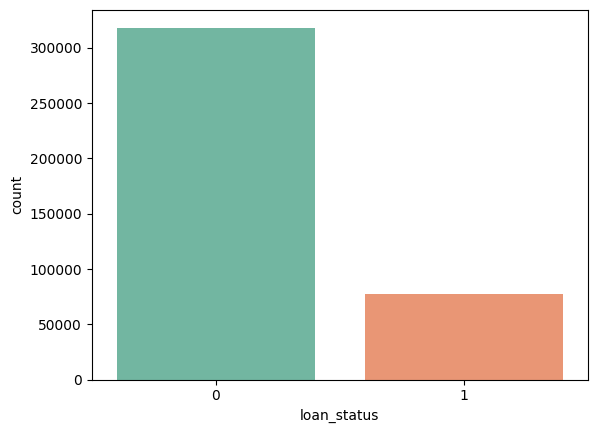

<string>:13: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


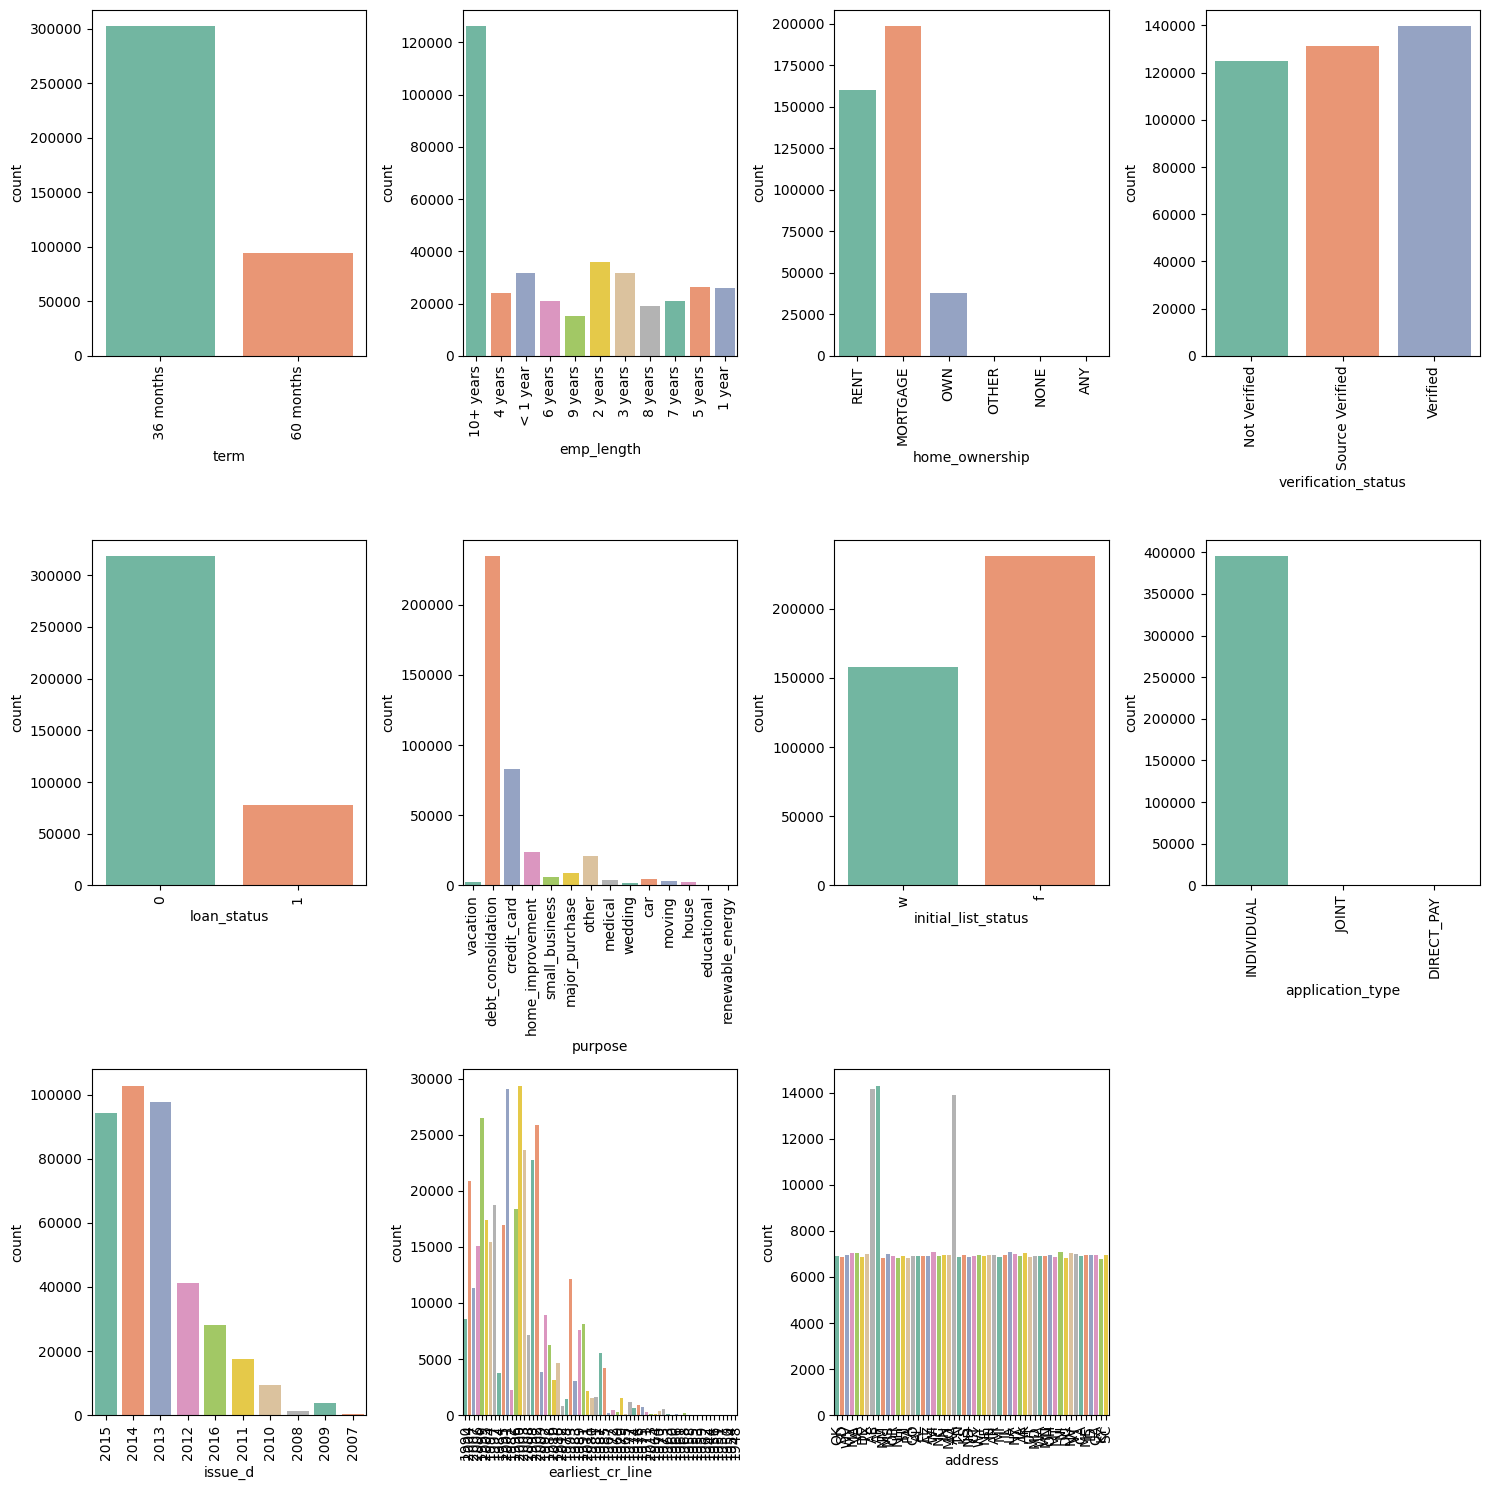

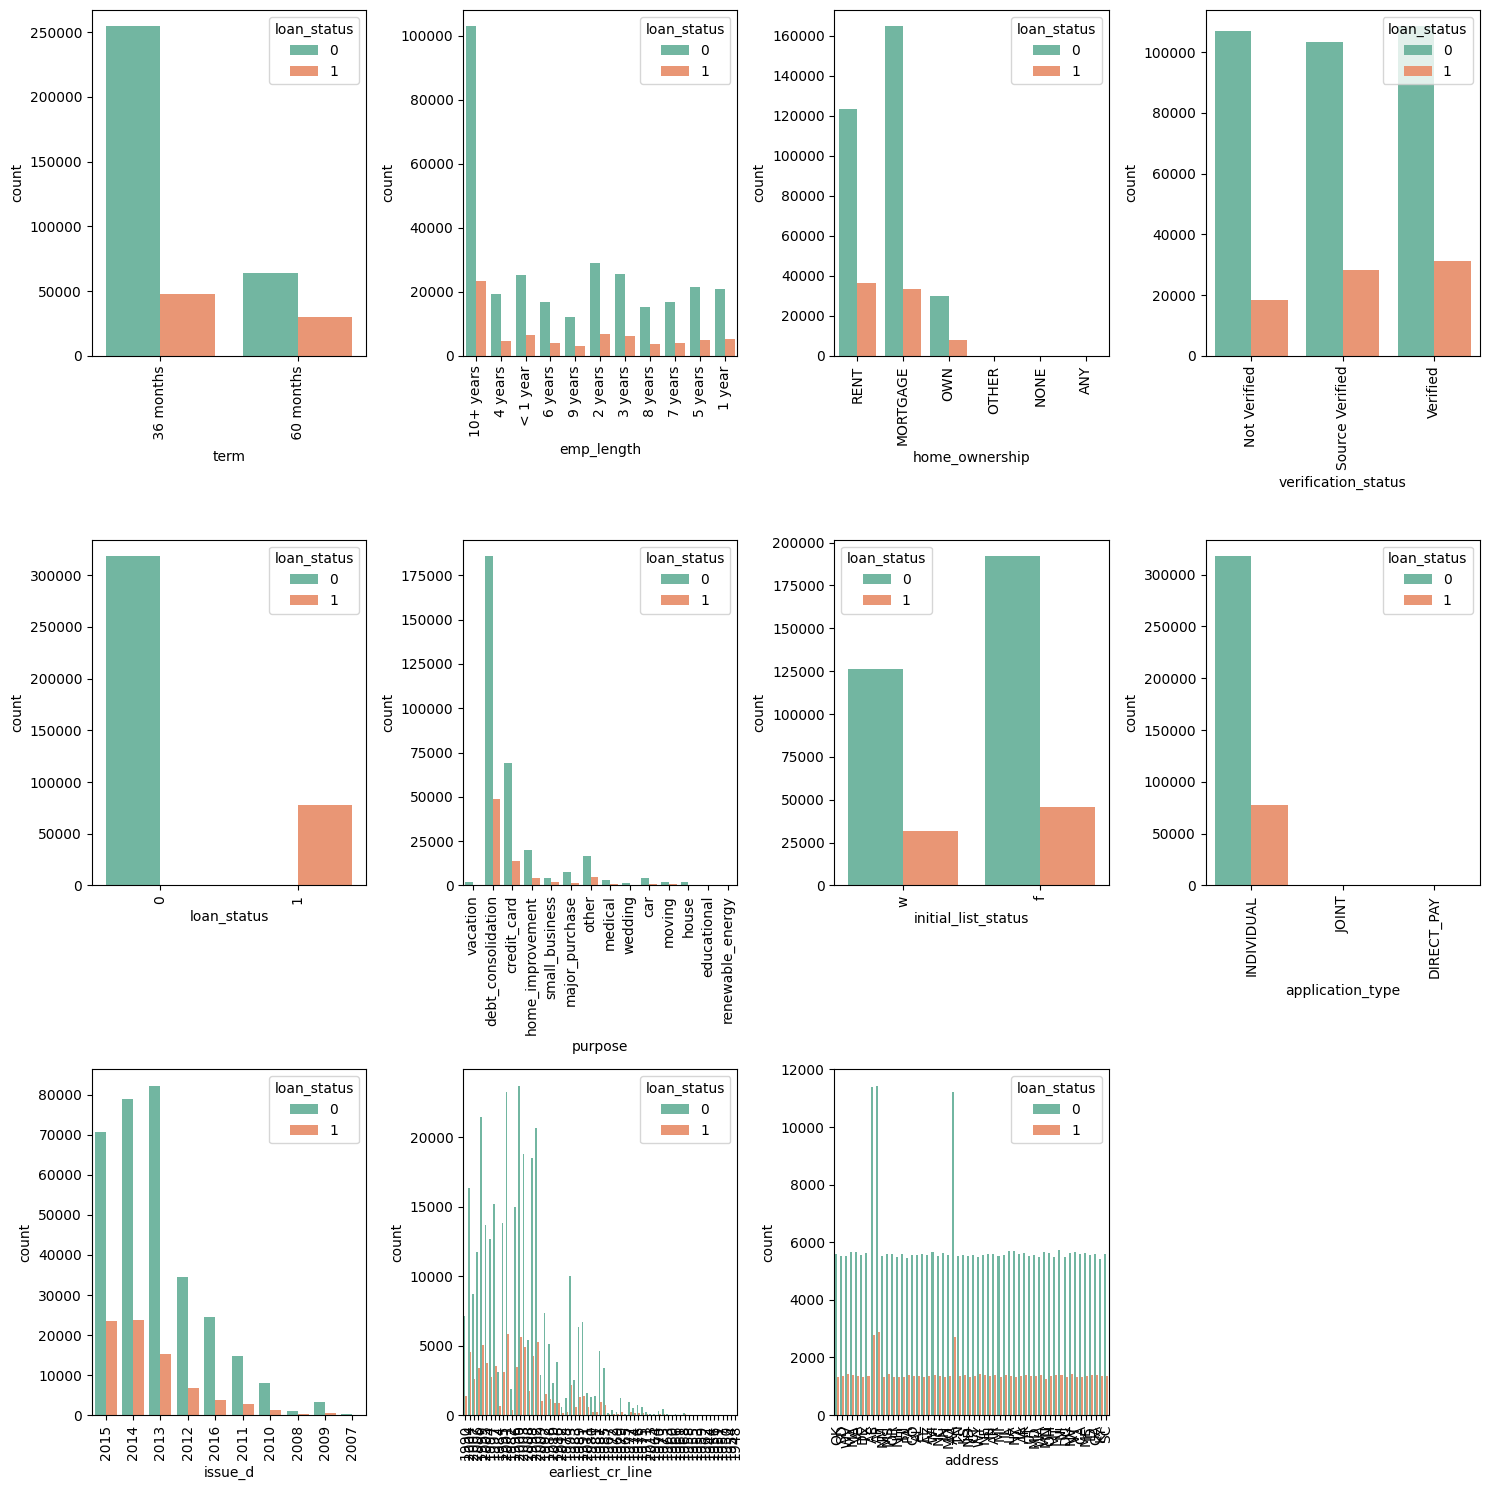

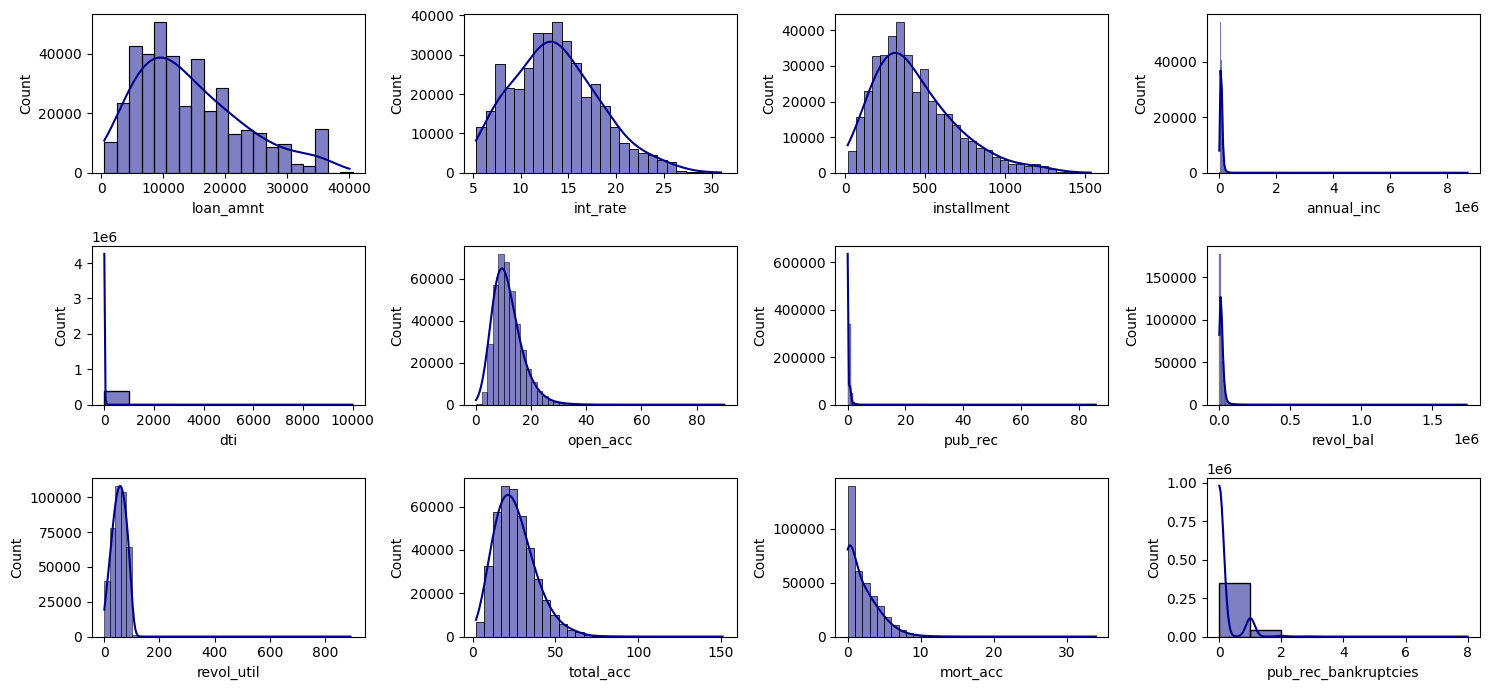

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your

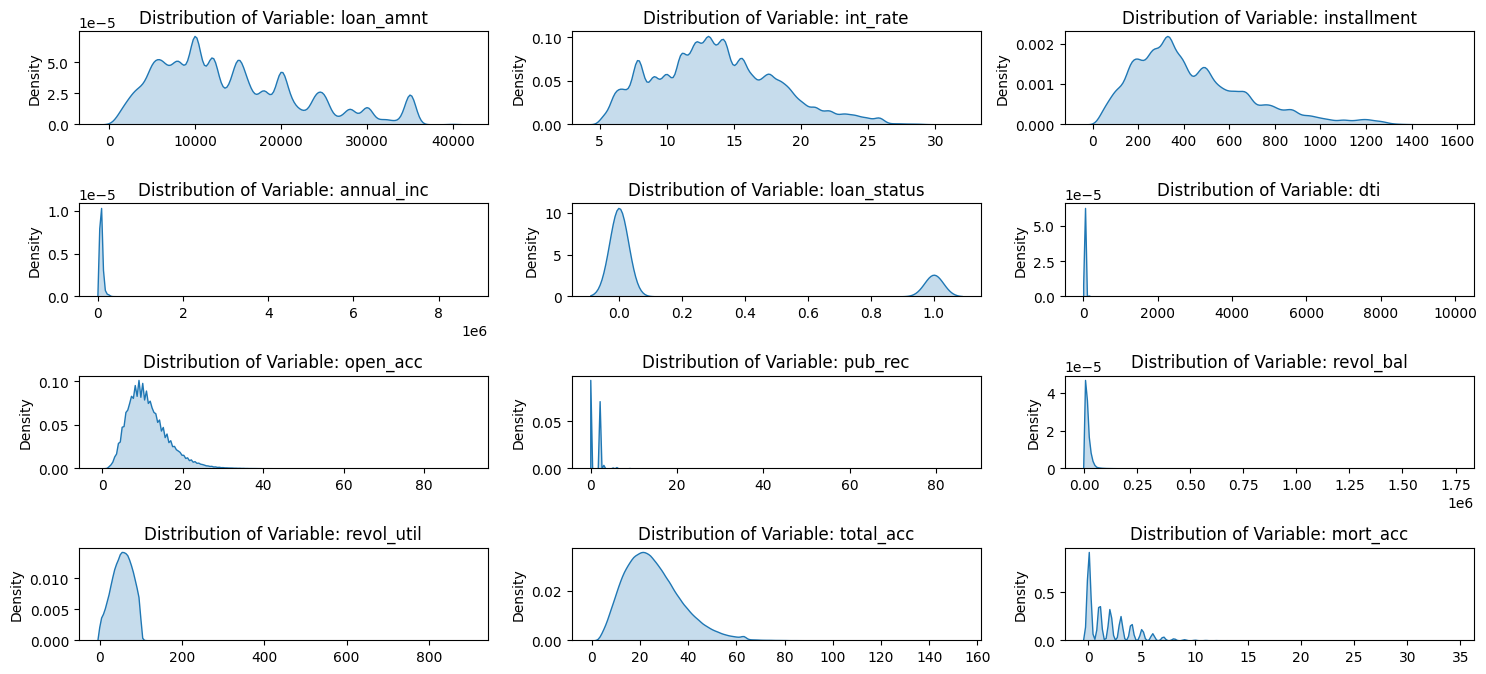

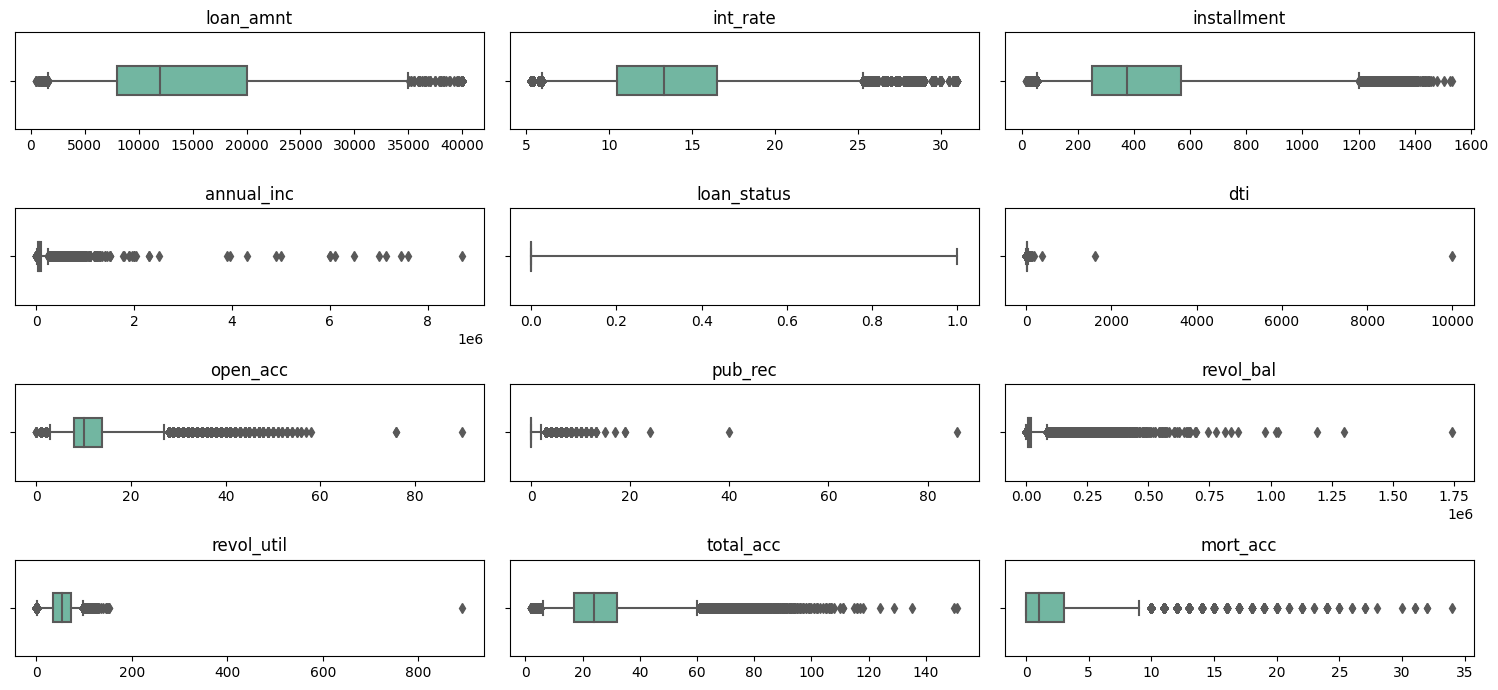

C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\Remo_\AppData\Roaming\Python\Python311\site-pa

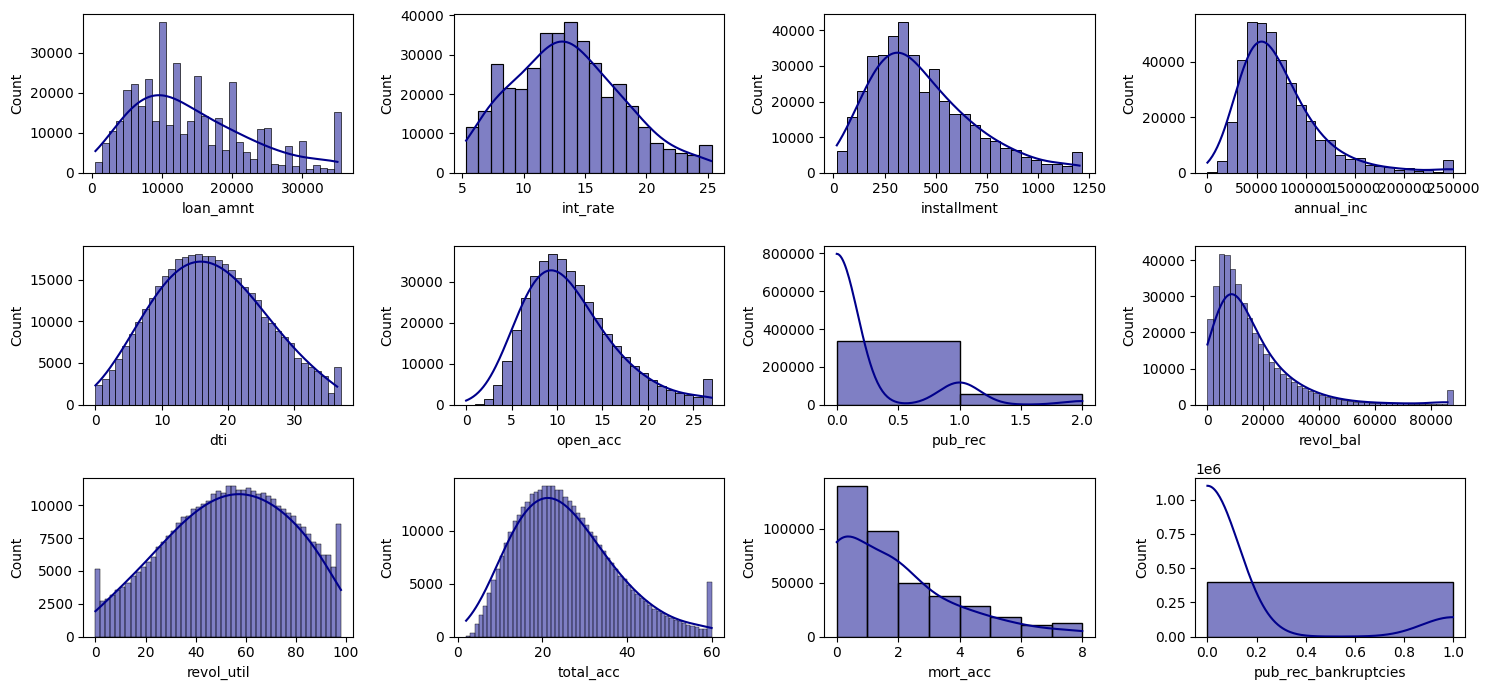

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your

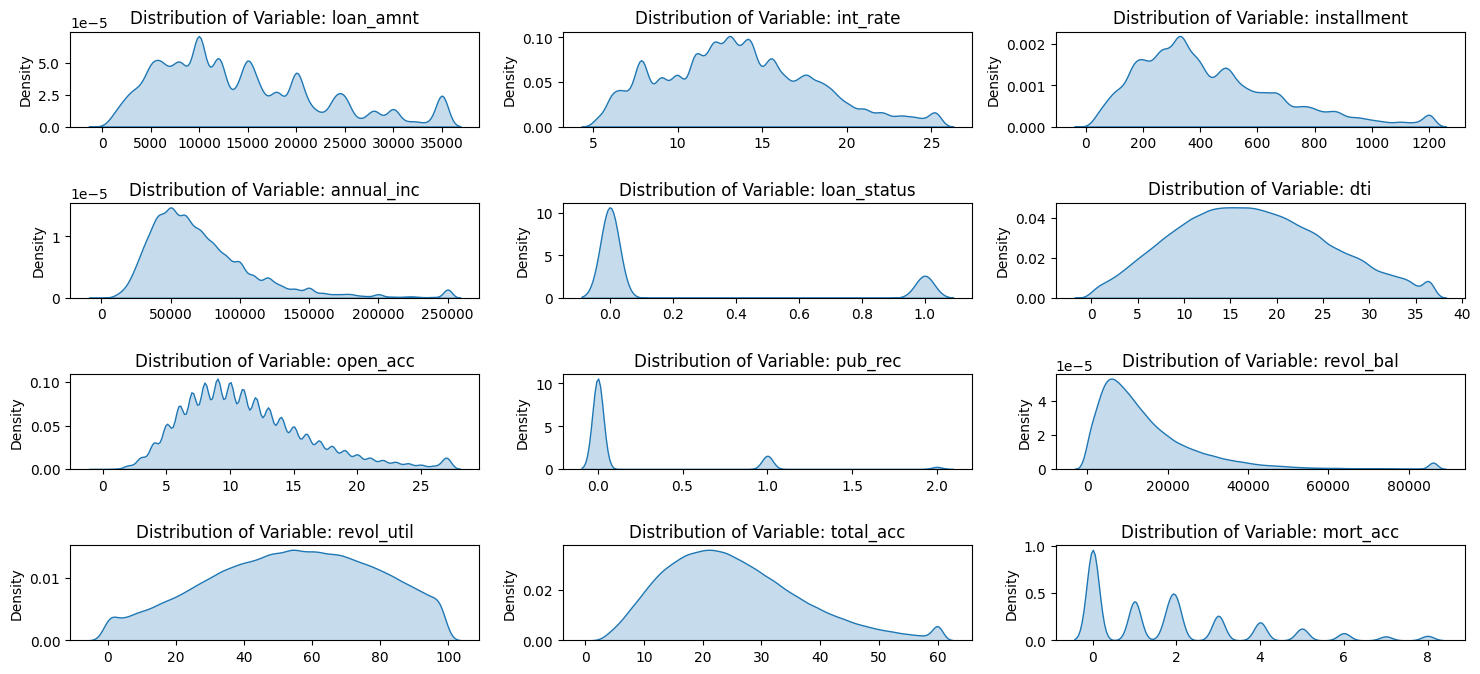


 loan_amnt :
25 percentile:  8000.0
75 percentile:  20000.0
IQR:  12000.0
Upper limit:  38000.0
Lower limit:  -10000.0

 int_rate :
25 percentile:  10.49
75 percentile:  16.49
IQR:  5.999999999999998
Upper limit:  25.489999999999995
Lower limit:  1.4900000000000038

 installment :
25 percentile:  250.33
75 percentile:  567.3
IQR:  316.9699999999999
Upper limit:  1042.7549999999999
Lower limit:  -225.12499999999986

 annual_inc :
25 percentile:  45000.0
75 percentile:  90000.0
IQR:  45000.0
Upper limit:  157500.0
Lower limit:  -22500.0

 dti :
25 percentile:  11.28
75 percentile:  22.98
IQR:  11.700000000000001
Upper limit:  40.53
Lower limit:  -6.270000000000001

 open_acc :
25 percentile:  8.0
75 percentile:  14.0
IQR:  6.0
Upper limit:  23.0
Lower limit:  -1.0

 pub_rec :
25 percentile:  0.0
75 percentile:  0.0
IQR:  0.0
Upper limit:  0.0
Lower limit:  0.0

 revol_bal :
25 percentile:  6025.0
75 percentile:  19620.0
IQR:  13595.0
Upper limit:  40012.5
Lower limit:  -14367.5

 revol_

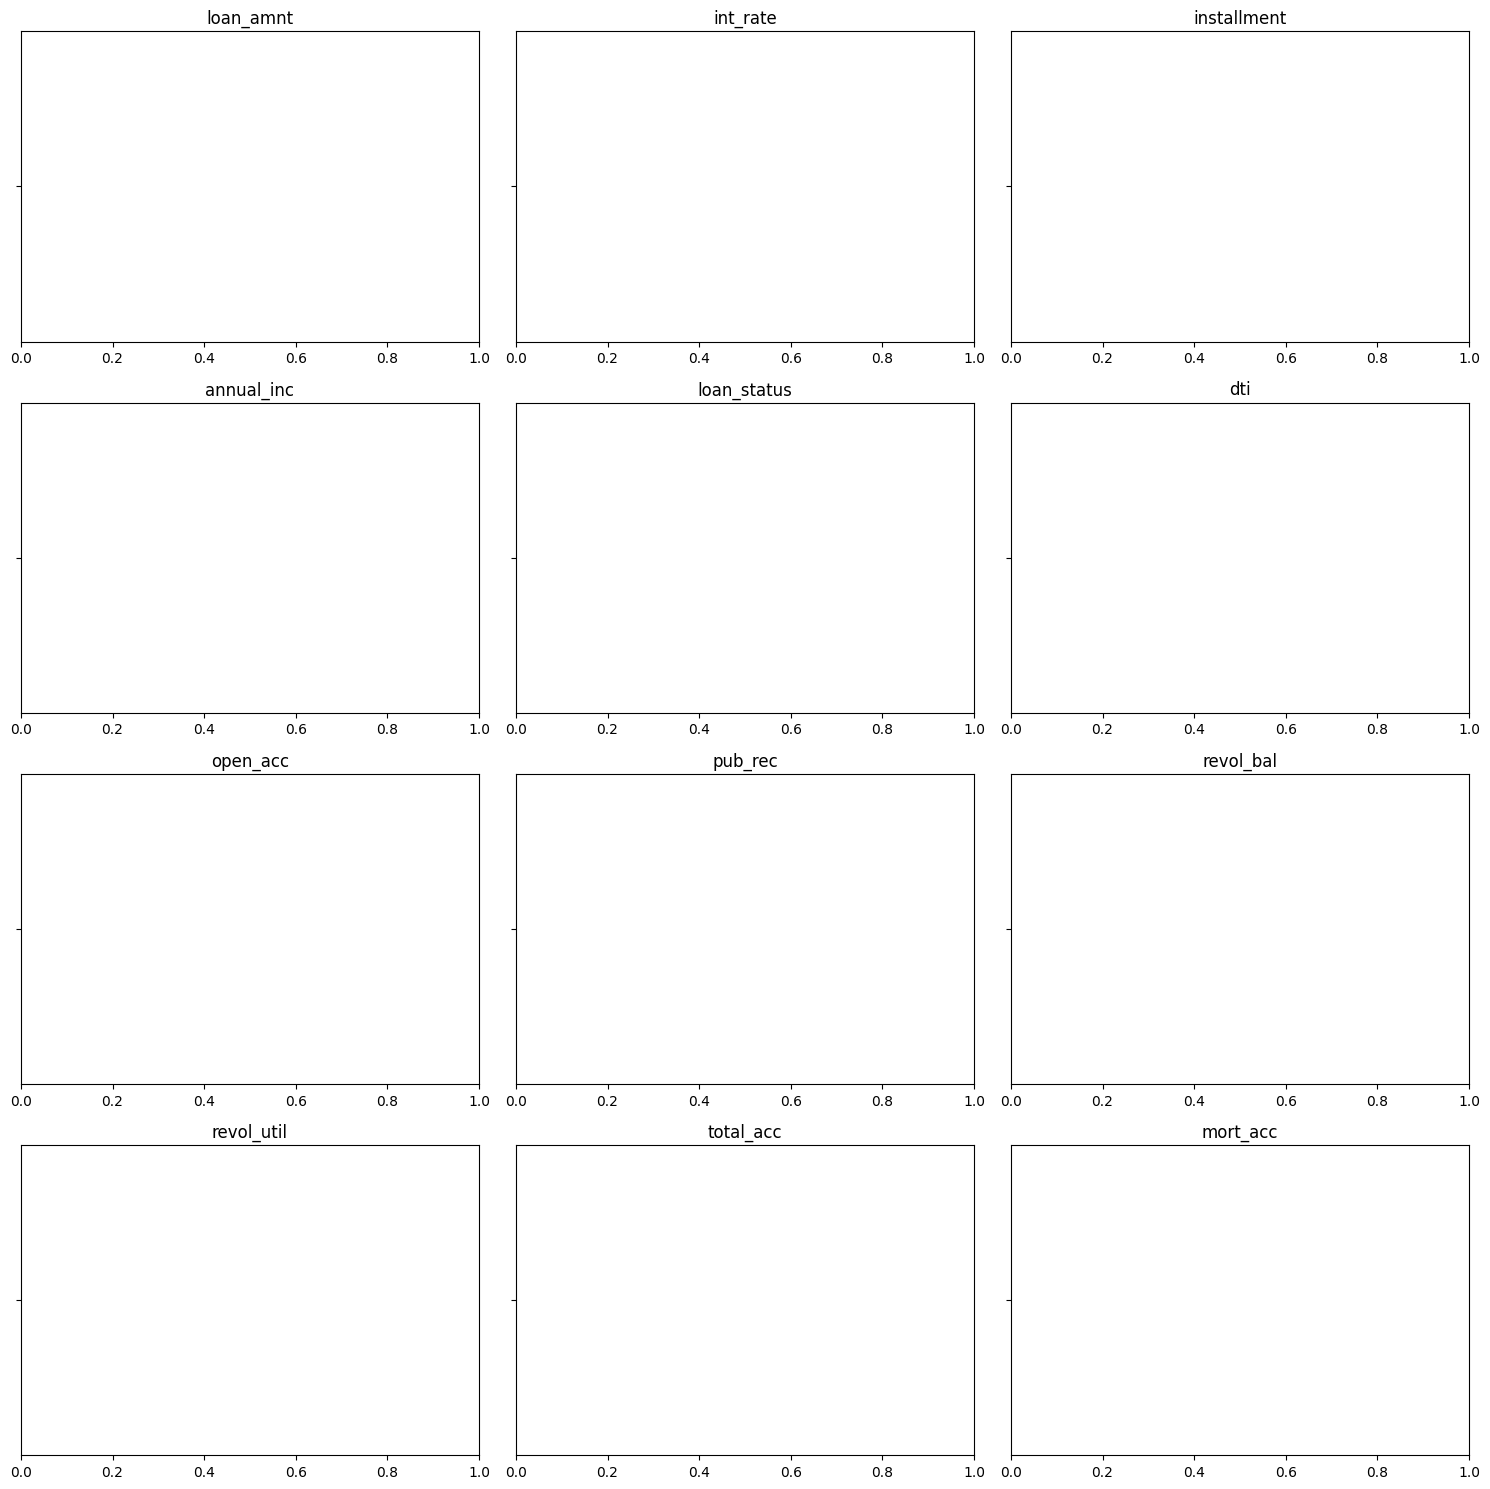


 loan_amnt :
99 percentile:  35000.0
01 percentile:  1600.0

 int_rate :
99 percentile:  25.28
01 percentile:  6.0

 installment :
99 percentile:  1202.3759999999916
01 percentile:  54.43

 annual_inc :
99 percentile:  250000.0
01 percentile:  19000.0

 dti :
99 percentile:  36.43
01 percentile:  1.56

 open_acc :
99 percentile:  27.0
01 percentile:  3.0

 pub_rec :
99 percentile:  2.0
01 percentile:  0.0

 revol_bal :
99 percentile:  86039.83999999939
01 percentile:  154.0

 revol_util :
99 percentile:  98.0
01 percentile:  1.02800000000002

 total_acc :
99 percentile:  60.0
01 percentile:  6.0

 mort_acc :
99 percentile:  8.0
01 percentile:  0.0

 pub_rec_bankruptcies :
99 percentile:  1.0
01 percentile:  0.0


Old Shape:  (396029, 23)
New Shape:  (308039, 23)
Size difference:  87990


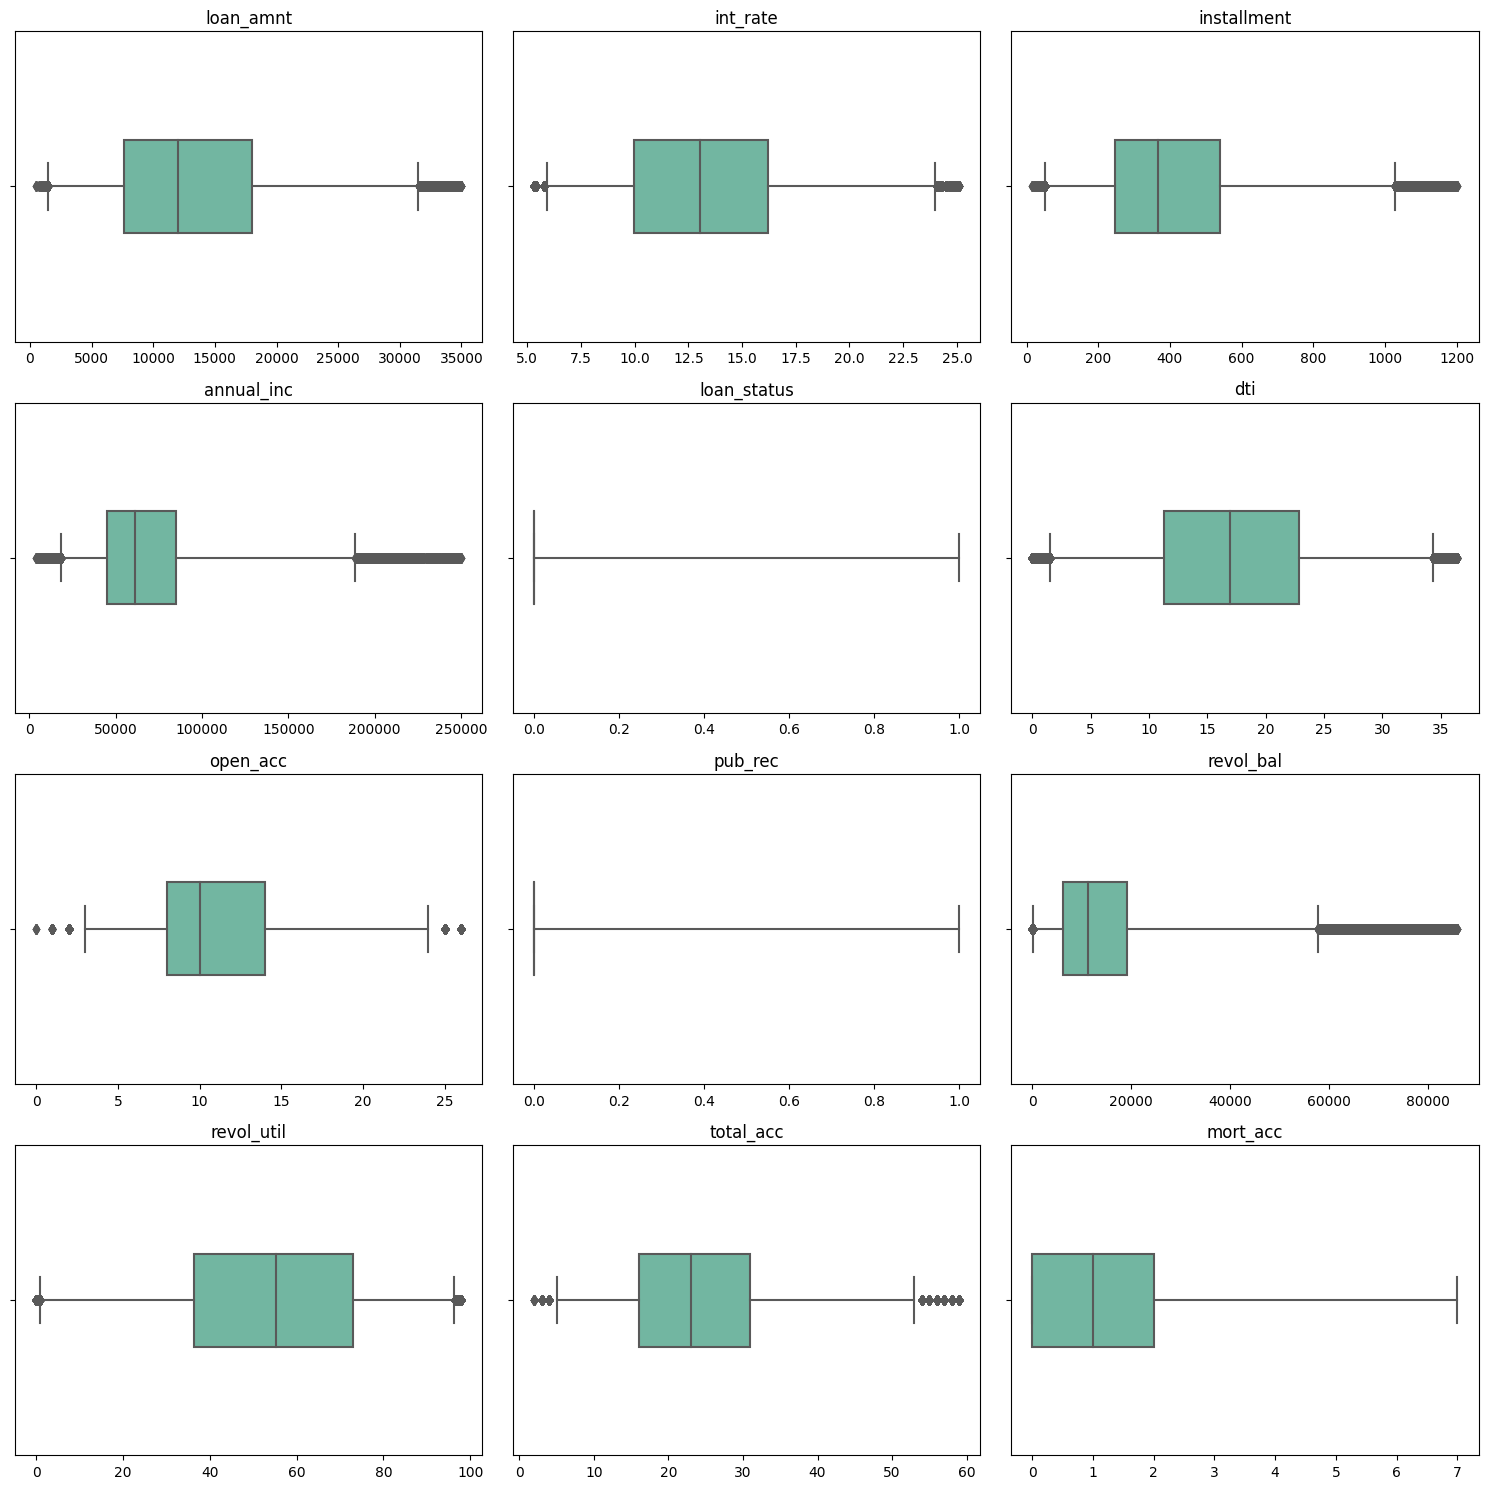

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your

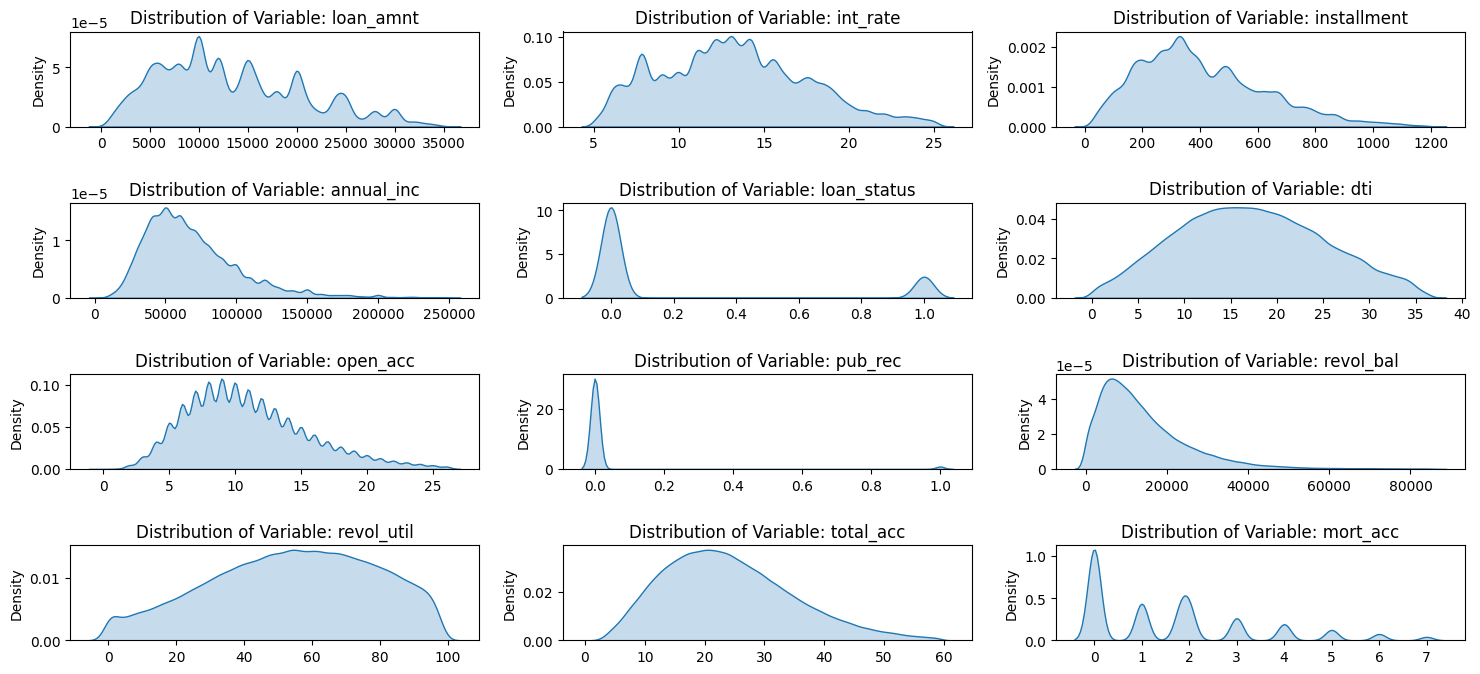

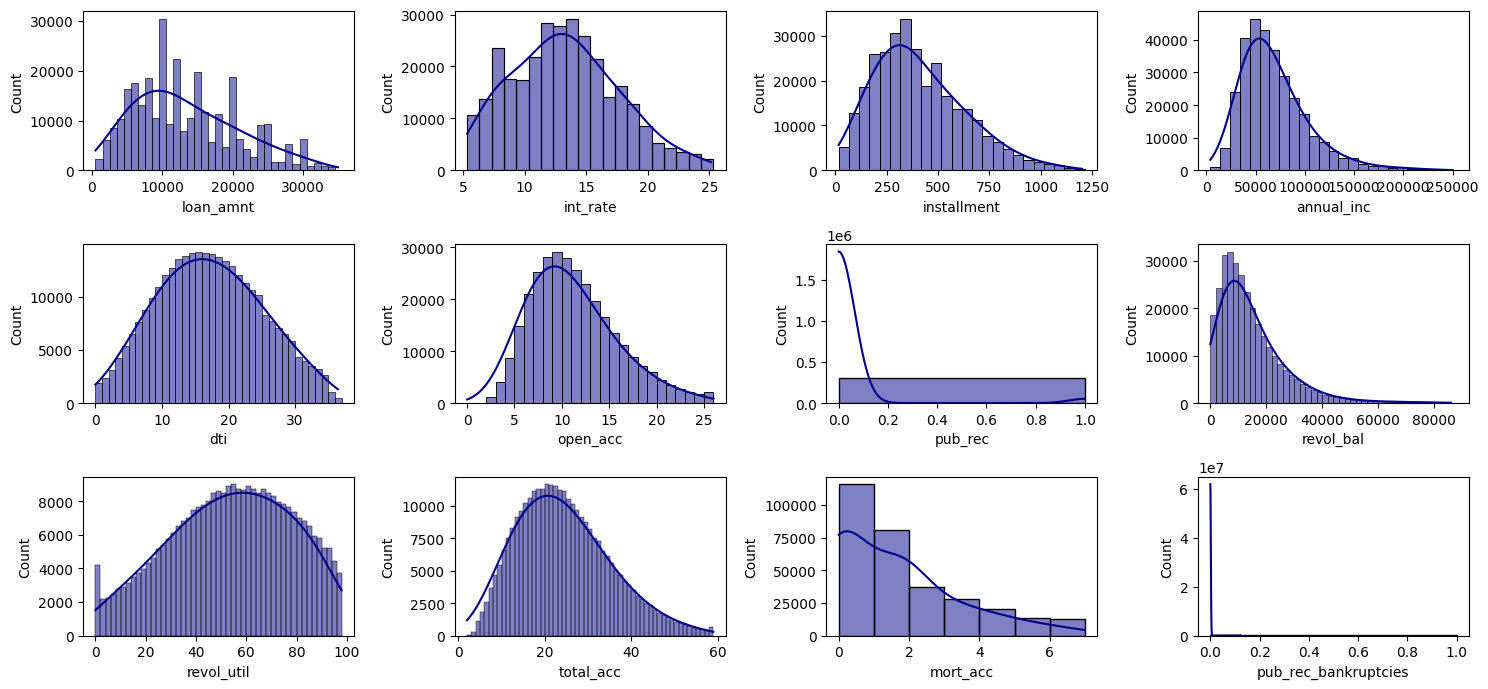

[1, 4, 5, 7, 8, 10, 12, 18, 19, 22]

['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

C:\Users\Remo_\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ohe__initial_list_status_f       ohe__address_AP                   0.00
ohe__address_AP                  ohe__initial_list_status_f        0.00
                                 ohe__initial_list_status_w        0.00
ohe__initial_list_status_w       ohe__address_AP                   0.00
ohe__address_TN                  ohe__earliest_cr_line_2011        0.00
                                                                   ... 
ohe__address_AA                  ohe__address_AA                   1.00
ohe__address_CA                  ohe__address_CA                   1.00
remainder__pub_rec_bankruptcies  remainder__pub_rec_bankruptcies   1.00
ohe__initial_list_status_f       ohe__initial_list_status_w        1.00
ohe__initial_list_status_w       ohe__initial_list_status_f        1.00
Length: 33489, dtype: float64

,,0
ohe__home_ownership_MORTGAGE,ohe__home_ownership_RENT,0.82
ohe__home_ownership_RENT,ohe__home_ownership_MORTGAGE,0.82
remainder__installment,remainder__loan_amnt,0.96
remainder__loan_amnt,remainder__installment,0.96
ohe__term_ 60 months,ohe__term_ 36 months,1.00
...,...,...
ohe__address_AA,ohe__address_AA,1.00
ohe__address_CA,ohe__address_CA,1.00
remainder__pub_rec_bankruptcies,remainder__pub_rec_bankruptcies,1.00
ohe__initial_list_status_f,ohe__initial_list_status_w,1.00


,,0


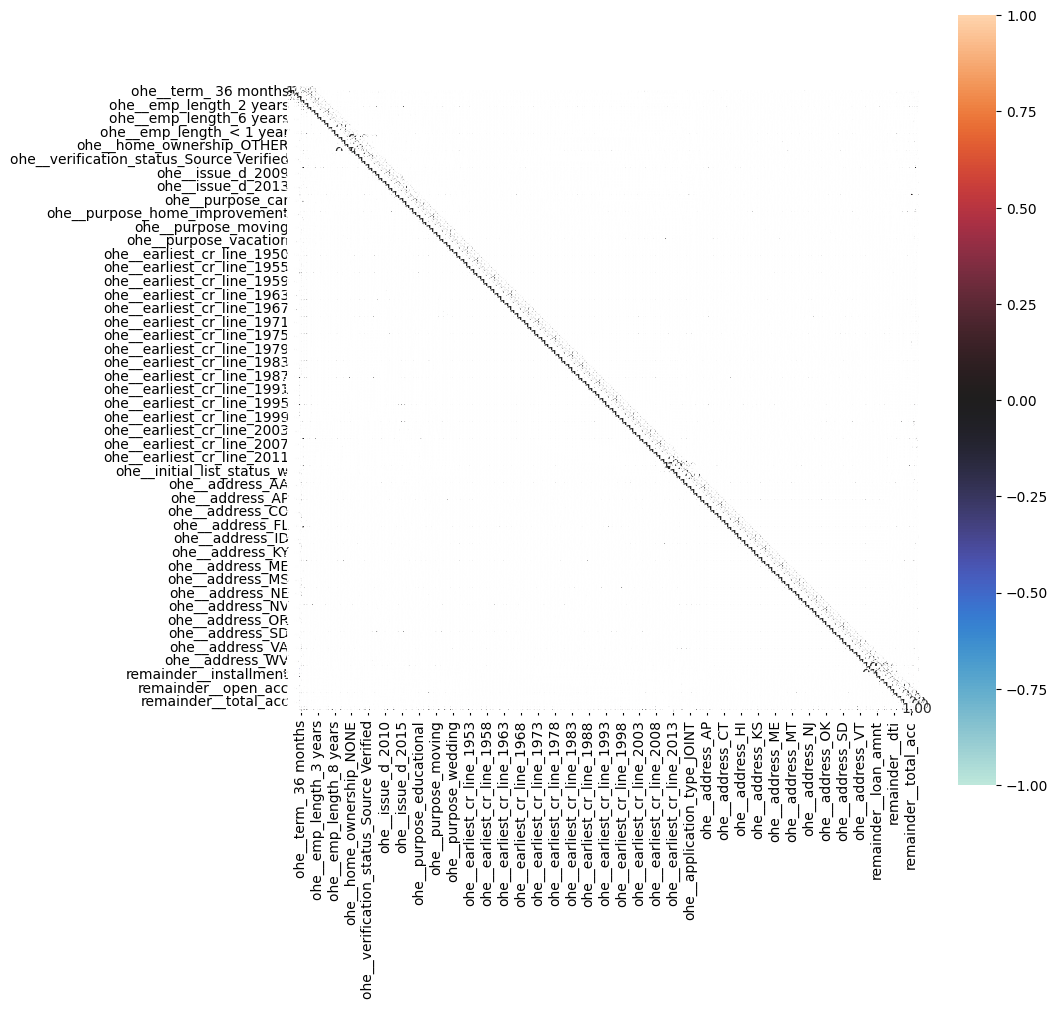

<string>:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


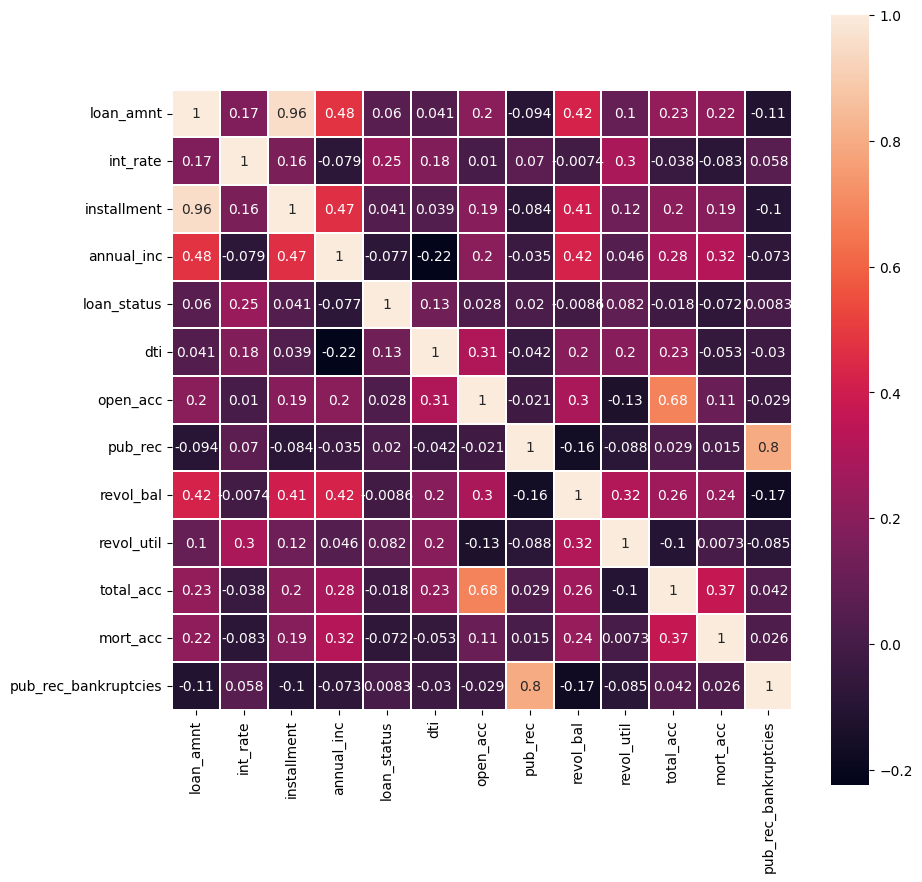

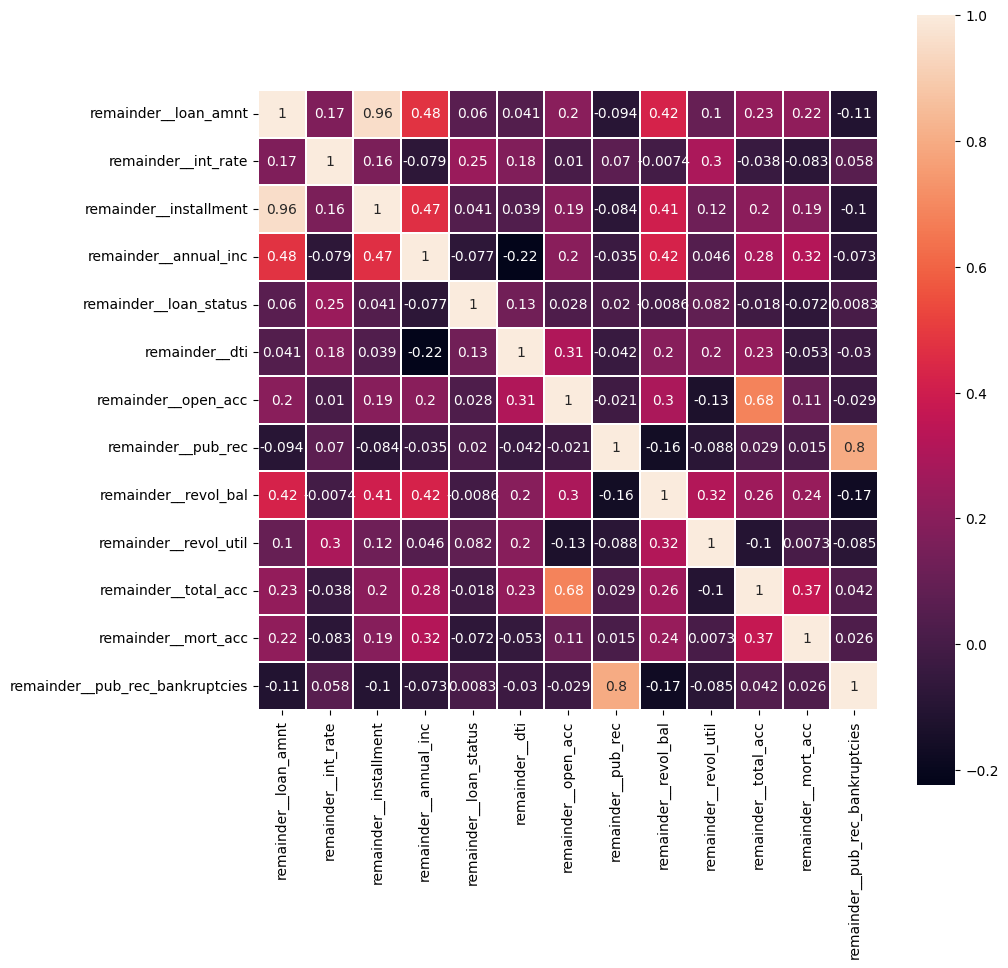

In [5]:
# pip install import_ipynb
import import_ipynb
#from Data_Cleaning import data_final, data_final_scaled, data_final_scaled_std

import Data_Cleaning as data_cleaned

In [ ]:
data = data_cleaned.data_final_scaled

test = data[data["remainder__loan_status"]==1]


In [ ]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

print('Training set size:', len(train_set))
print('Testing set size:', len(test_set))




Training set size: 316823
Testing set size: 79206


In [ ]:
len(train_set[train_set["remainder__loan_status"]==0])/len(train_set)

0.8041398509577903

In [ ]:
train_set

,ohe__term_ 36 months,ohe__term_ 60 months,ohe__emp_length_1 year,ohe__emp_length_10+ years,ohe__emp_length_2 years,ohe__emp_length_3 years,ohe__emp_length_4 years,ohe__emp_length_5 years,ohe__emp_length_6 years,ohe__emp_length_7 years,ohe__emp_length_8 years,ohe__emp_length_9 years,ohe__emp_length_< 1 year,ohe__home_ownership_ANY,ohe__home_ownership_MORTGAGE,ohe__home_ownership_NONE,ohe__home_ownership_OTHER,ohe__home_ownership_OWN,ohe__home_ownership_RENT,ohe__verification_status_Not Verified,ohe__verification_status_Source Verified,ohe__verification_status_Verified,ohe__issue_d_2007,ohe__issue_d_2008,ohe__issue_d_2009,ohe__issue_d_2010,ohe__issue_d_2011,ohe__issue_d_2012,ohe__issue_d_2013,ohe__issue_d_2014,ohe__issue_d_2015,ohe__issue_d_2016,ohe__purpose_car,ohe__purpose_credit_card,ohe__purpose_debt_consolidation,ohe__purpose_educational,ohe__purpose_home_improvement,ohe__purpose_house,ohe__purpose_major_purchase,ohe__purpose_medical,ohe__purpose_moving,ohe__purpose_other,ohe__purpose_renewable_energy,ohe__purpose_small_business,ohe__purpose_vacation,ohe__purpose_wedding,ohe__earliest_cr_line_1944,ohe__earliest_cr_line_1948,ohe__earliest_cr_line_1950,ohe__earliest_cr_line_1951,ohe__earliest_cr_line_1953,ohe__earliest_cr_line_1954,ohe__earliest_cr_line_1955,ohe__earliest_cr_line_1956,ohe__earliest_cr_line_1957,ohe__earliest_cr_line_1958,ohe__earliest_cr_line_1959,ohe__earliest_cr_line_1960,ohe__earliest_cr_line_1961,ohe__earliest_cr_line_1962,ohe__earliest_cr_line_1963,ohe__earliest_cr_line_1964,ohe__earliest_cr_line_1965,ohe__earliest_cr_line_1966,ohe__earliest_cr_line_1967,ohe__earliest_cr_line_1968,ohe__earliest_cr_line_1969,ohe__earliest_cr_line_1970,ohe__earliest_cr_line_1971,ohe__earliest_cr_line_1972,ohe__earliest_cr_line_1973,ohe__earliest_cr_line_1974,ohe__earliest_cr_line_1975,ohe__earliest_cr_line_1976,ohe__earliest_cr_line_1977,ohe__earliest_cr_line_1978,ohe__earliest_cr_line_1979,ohe__earliest_cr_line_1980,ohe__earliest_cr_line_1981,ohe__earliest_cr_line_1982,ohe__earliest_cr_line_1983,ohe__earliest_cr_line_1984,ohe__earliest_cr_line_1985,ohe__earliest_cr_line_1986,ohe__earliest_cr_line_1987,ohe__earliest_cr_line_1988,ohe__earliest_cr_line_1989,ohe__earliest_cr_line_1990,ohe__earliest_cr_line_1991,ohe__earliest_cr_line_1992,ohe__earliest_cr_line_1993,ohe__earliest_cr_line_1994,ohe__earliest_cr_line_1995,ohe__earliest_cr_line_1996,ohe__earliest_cr_line_1997,ohe__earliest_cr_line_1998,ohe__earliest_cr_line_1999,ohe__earliest_cr_line_2000,ohe__earliest_cr_line_2001,ohe__earliest_cr_line_2002,ohe__earliest_cr_line_2003,ohe__earliest_cr_line_2004,ohe__earliest_cr_line_2005,ohe__earliest_cr_line_2006,ohe__earliest_cr_line_2007,ohe__earliest_cr_line_2008,ohe__earliest_cr_line_2009,ohe__earliest_cr_line_2010,ohe__earliest_cr_line_2011,ohe__earliest_cr_line_2012,ohe__earliest_cr_line_2013,ohe__initial_list_status_f,ohe__initial_list_status_w,ohe__application_type_DIRECT_PAY,ohe__application_type_INDIVIDUAL,ohe__application_type_JOINT,ohe__address_AA,ohe__address_AE,ohe__address_AK,ohe__address_AL,ohe__address_AP,ohe__address_AR,ohe__address_AZ,ohe__address_CA,ohe__address_CO,ohe__address_CT,ohe__address_DC,ohe__address_DE,ohe__address_FL,ohe__address_GA,ohe__address_HI,ohe__address_IA,ohe__address_ID,ohe__address_IL,ohe__address_IN,ohe__address_KS,ohe__address_KY,ohe__address_LA,ohe__address_MA,ohe__address_MD,ohe__address_ME,ohe__address_MI,ohe__address_MN,ohe__address_MO,ohe__address_MS,ohe__address_MT,ohe__address_NC,ohe__address_ND,ohe__address_NE,ohe__address_NH,ohe__address_NJ,ohe__address_NM,ohe__address_NV,ohe__address_NY,ohe__address_OH,ohe__address_OK,ohe__address_OR,ohe__address_PA,ohe__address_RI,ohe__address_SC,ohe__address_SD,ohe__address_TN,ohe__address_TX,ohe__address_UT,ohe__address_VA,ohe__address_VT,ohe__address_WA,ohe__address_WI,ohe__address_WV,ohe__address_WY,remainder__loan_amnt,remainder__int_rate,remainder__installment,remainder__annual_inc,remainder__loan_status,remainder__dti,remainder__open_a

In [ ]:
#Defining the datasets
Y_train = train_set["remainder__loan_status"]
X_train = train_set.drop("remainder__loan_status", axis=1)
Y_test = test_set["remainder__loan_status"]
X_test = test_set.drop("remainder__loan_status", axis=1)

In [ ]:
#Balanced Datasets fot training

train_set_d = train_set[train_set["remainder__loan_status"] == 1].sample(train_set[train_set["remainder__loan_status"]==1])
train_set_bal_nd = train_set[train_set["remainder__loan_status"] == 0].sample(train_set[train_set["remainder__loan_status"]==1])
train_set_balanced = train_set_d.append(train_set_bal_nd)

Y_train_bal = train_set_balanced["remainder__loan_status"]
X_train_bal = train_set_balanced.drop("remainder__loan_status", axis=1)

len(train_set_balanced)

NameError: name 'train_set' is not defined

## Models

### Basic Model
We use two different Models, one with two hidden layers with 10 neurons.
The Second one uses regularizers and dropout layers


In [ ]:
#Basic Model 

from keras_visualizer import visualizer 
model1 = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(16, activation="relu", kernel_initializer='he_uniform', input_shape=(182,)),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

visualizer(model1, format='png', view=True)

In [ ]:
#Model with regularizers and Dropout layers
model2 = keras.models.Sequential([
    #Input Layer (182 features)
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01),input_shape=(182,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation="sigmoid") #1 neuron because binary
])

#### Split model
This model splits the hidden layers in two different "networks" with 4 neurons each.

In [ ]:
inputs = keras.layers.Input(shape=(182,))

#First Layer
x = keras.layers.Dense(8, activation='relu')(inputs)

#Split Second Layer in Branches
x1 = keras.layers.Dense(4, activation='relu')(x)
x2 = keras.layers.Dense(4, activation='relu')(x)

#Combine
x = keras.layers.concatenate([x1, x2])

#Output Layer
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model3 = keras.models.Model(inputs=inputs, outputs=outputs)

### Model compilation

In [ ]:
lr = 0.001

model1.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=lr),
              metrics=["accuracy"])

model2.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=["accuracy"])

model3.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=lr),
              metrics=["accuracy"])

#### Fitting the models

In [ ]:
models = (model1, model2, model3)

models_bal = (model1, model2, model3)
batch_size = 100
epochs = 5

#Fitting the models with the full training set
for m in models:
    history = m.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
                    validation_data=(X_test, Y_test))
    print("Evaluatio - Full Dataset")
    m.evaluate(X_test, Y_test)
    print("______________________________________")

#Fitting the models with the balanced training set

for m in models_bal:
    history_bal = m.fit(X_train_bal, Y_train_bal, batch_size=batch_size, epochs=epochs, 
                    validation_data=(X_test, Y_test))
    print("Evaluation - Balanced Dataset")
    m.evaluate(X_test, Y_test)
    print("______________________________________")
  

Epoch 1/5
2377/2377 [==============================] - 21s 8ms/step - loss: 0.5361 - accuracy: 0.7910 - val_loss: 0.4941 - val_accuracy: 0.8031
Epoch 2/5
2377/2377 [==============================] - 19s 8ms/step - loss: 0.4890 - accuracy: 0.8044 - val_loss: 0.4876 - val_accuracy: 0.8031
Epoch 3/5
2377/2377 [==============================] - 18s 7ms/step - loss: 0.4830 - accuracy: 0.8044 - val_loss: 0.4822 - val_accuracy: 0.8031
Epoch 4/5
2377/2377 [==============================] - 18s 7ms/step - loss: 0.4779 - accuracy: 0.8044 - val_loss: 0.4775 - val_accuracy: 0.8031
Epoch 5/5
2377/2377 [==============================] - 20s 8ms/step - loss: 0.4736 - accuracy: 0.8044 - val_loss: 0.4737 - val_accuracy: 0.8031
Evaluation
4951/4951 [==============================] - 19s 4ms/step - loss: 0.4737 - accuracy: 0.8031
______________________________________
Epoch 1/5
2377/2377 [==============================] - 19s 8ms/step - loss: 0.4700 - accuracy: 0.8043 - val_loss: 0.4706 - val_accuracy: 0

## Confusion Matrix

4951/4951 [==============================] - 18s 4ms/step
[[126955    261]
 [ 30862    334]]


0.8035312981339797

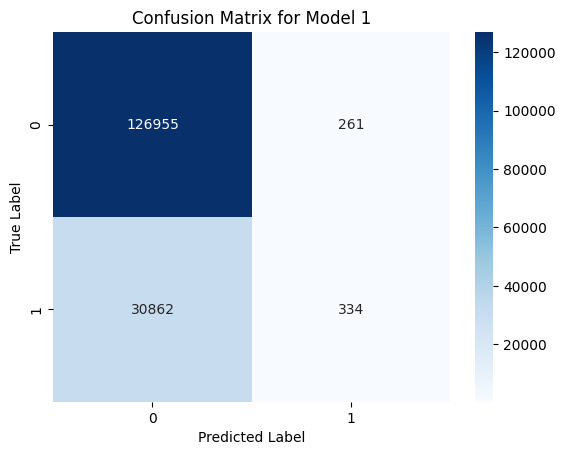

4951/4951 [==============================] - 19s 4ms/step
[[ 18323 108893]
 [  3933  27263]]


0.2877686033886322

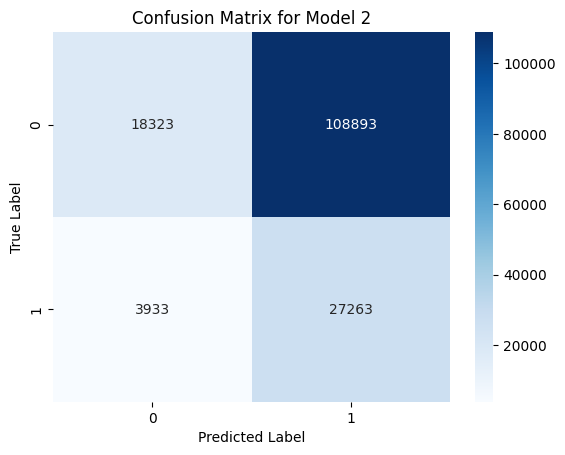

4951/4951 [==============================] - 12s 2ms/step
[[118361   8855]
 [ 28801   2395]]


0.7622907355503371

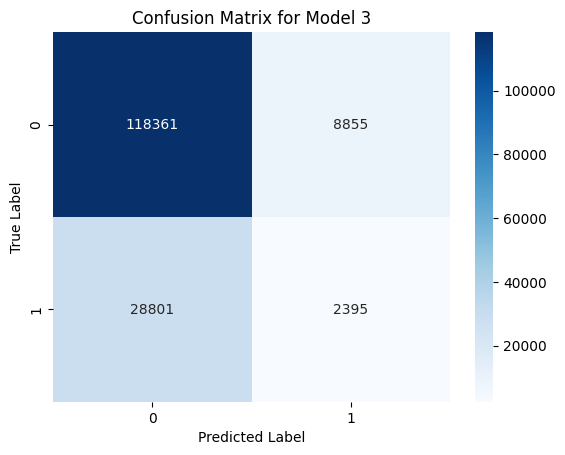

In [ ]:
import matplotlib.pyplot as plt

#Confusion Matrix for the models trained with the full dataset

for i, m in enumerate(models):
    y_pred = m.predict(X_test)
    y_pred = (y_pred > 0.5) 
    # Convert np array to Series
    my_list = map(lambda x: x[0], y_pred)
    y_pred = pd.Series(my_list)
    # Convert True/False values back to 1 and 0s
    y_prediction = y_pred.astype(int)
    
    # Measuring Accuracy of our Model
    cm = confusion_matrix(Y_test, y_prediction)
    print(cm)
    display(accuracy_score(Y_test, y_prediction))
    # Assign confusion matrix values to variables 
    TP = cm[1, 1] # True positives 
    TN = cm[0, 0] # True negatives 
    FP = cm[0, 1] # False positives
    FN = cm[1, 0] # False negatives
    
    # Create a new figure for each model
    plt.figure(i+1)
    sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
    plt.title(f"Confusion Matrix for Model {i+1}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    plt.show() # Display the figure for the current model


In [ ]:
#Confusion Matrix for the models trained with the balanced Dataset

for i, m in enumerate(models_bal):
    y_pred = m.predict(X_test)
    y_pred = (y_pred > 0.5) 
    # Convert np array to Series
    my_list = map(lambda x: x[0], y_pred)
    y_pred = pd.Series(my_list)
    # Convert True/False values back to 1 and 0s
    y_prediction = y_pred.astype(int)
    
    # Measuring Accuracy of our Model
    cm = confusion_matrix(Y_test, y_prediction)
    print(cm)
    display(accuracy_score(Y_test, y_prediction))
    # Assign confusion matrix values to variables 
    TP = cm[1, 1] # True positives 
    TN = cm[0, 0] # True negatives 
    FP = cm[0, 1] # False positives
    FN = cm[1, 0] # False negatives
    
    # Create a new figure for each model
    plt.figure(i+1)
    sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
    plt.title(f"Confusion Matrix for Model {i+1}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    plt.show() # Display the figure for the current model

# Transfer Learning